<a href="https://colab.research.google.com/github/sunilthapa-in/sunilthapa-in/blob/main/TLSPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install samna

ORDINARY REGRESSION. WHICH IS THE WRONG TOOL.

Please upload at least 5 pickle files.


Saving rotation_105_trial_18.pickle to rotation_105_trial_18.pickle
Saving rotation_120_trial_4.pickle to rotation_120_trial_4.pickle
Saving rotation_135_trial_1.pickle to rotation_135_trial_1.pickle
Saving rotation_150_trial_9.pickle to rotation_150_trial_9.pickle
Saving rotation_165_trial_17.pickle to rotation_165_trial_17.pickle


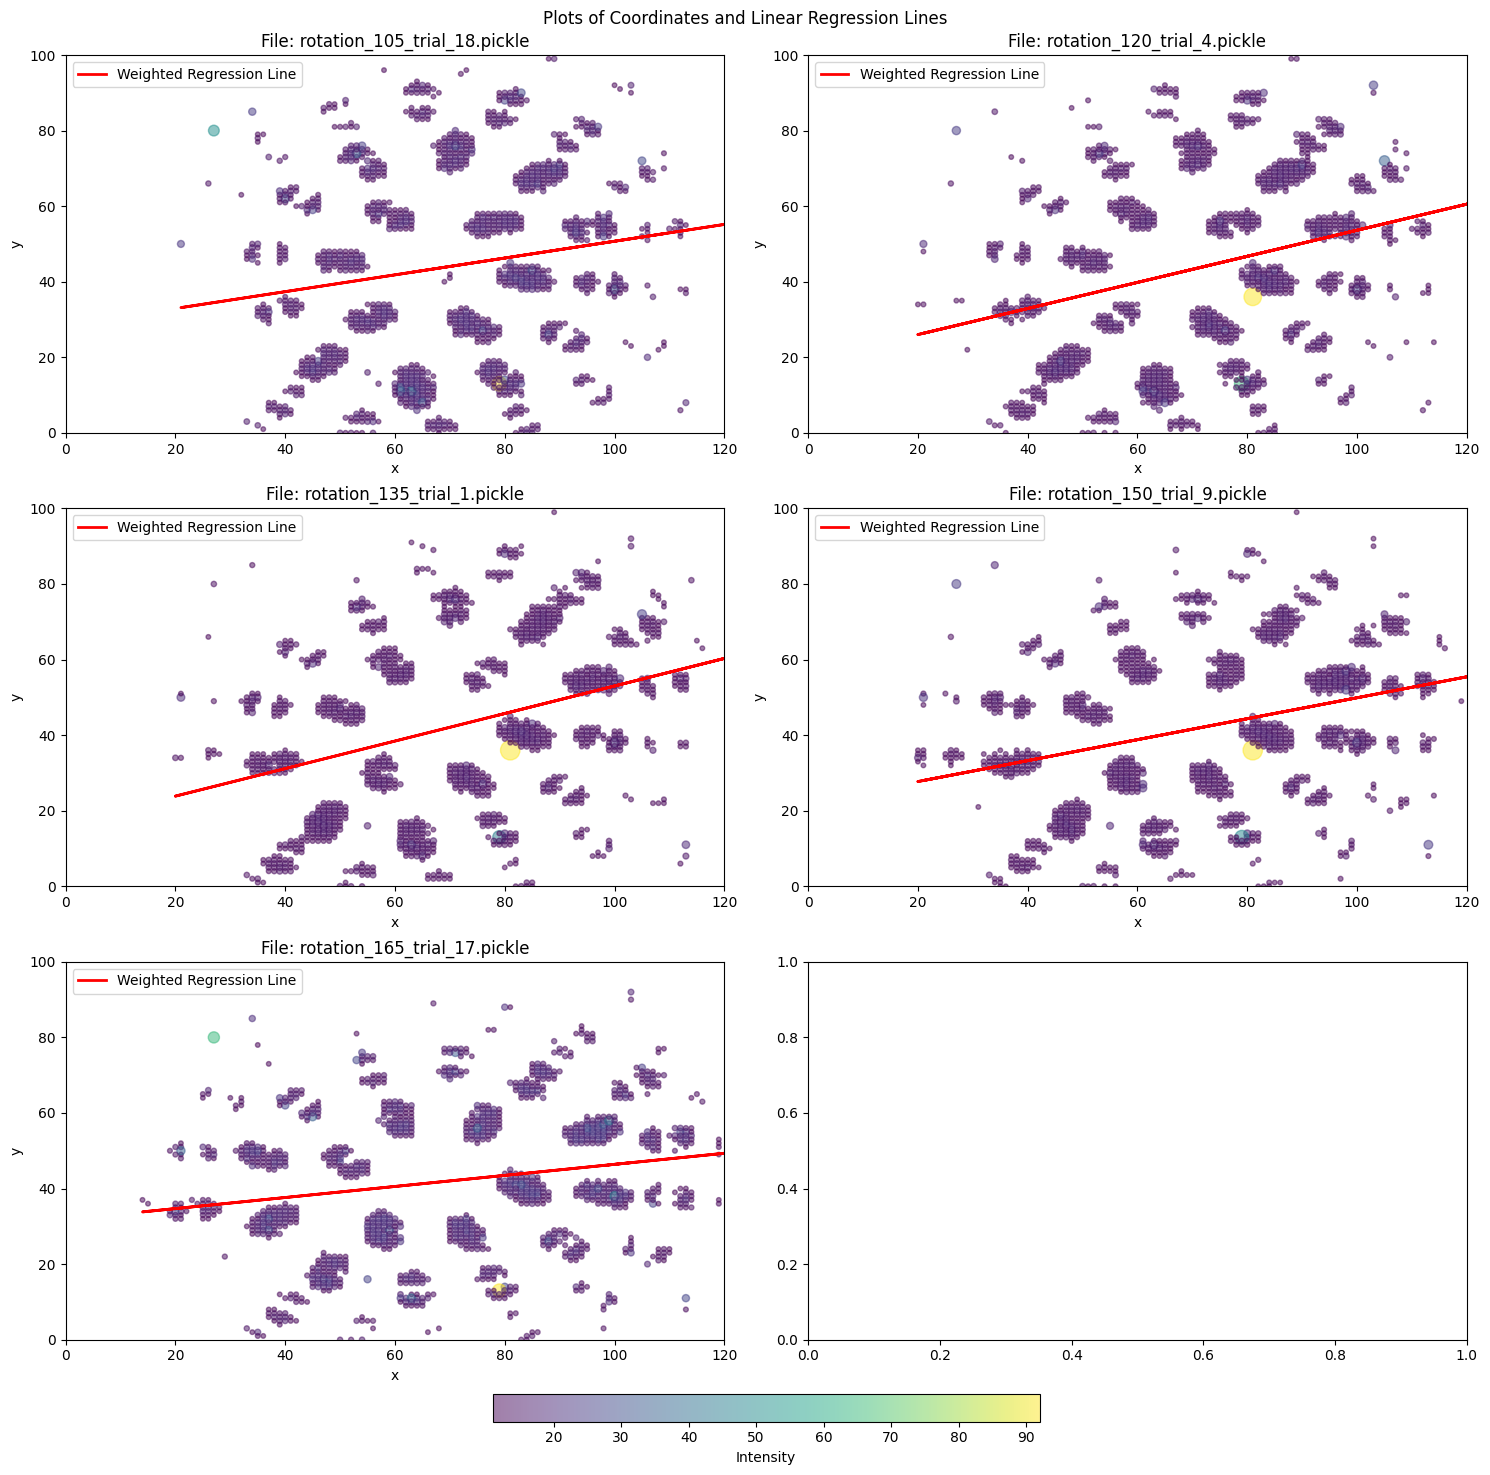

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from google.colab import files
from collections import Counter
from sklearn.linear_model import LinearRegression

def process_file(pickle_filename):
    # Load data
    with open(pickle_filename, 'rb') as infile:
        data = pickle.load(infile)

    # Collect all (x, y) coordinates
    coordinates = [(event.x, event.y) for event in data]

    return coordinates

def plot_coordinates_with_intensity(ax, coordinate_counts):
    # Filter coordinates that appear more than 10 times and less than 200 times
    filtered_coords = {coord: count for coord, count in coordinate_counts.items() if 10 < count < 200}

    if filtered_coords:
        x_coords, y_coords = zip(*filtered_coords.keys())
        intensities = list(filtered_coords.values())

        # Plot the filtered (x, y) coordinates with intensity
        scatter = ax.scatter(x_coords, y_coords, s=intensities, alpha=0.5, c=intensities, cmap='viridis')
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_xlim(0, 120)
        ax.set_ylim(0, 100)
        return scatter, filtered_coords

def plot_linear_regression(ax, filtered_coords):
    if filtered_coords:
        x_coords, y_coords = zip(*filtered_coords.keys())
        timestamp_counts = list(filtered_coords.values())

        # Prepare data for weighted linear regression
        X = np.array(x_coords).reshape(-1, 1)
        y = np.array(y_coords)
        weights = np.array(timestamp_counts)

        # Fit a weighted linear regression model
        model = LinearRegression()
        model.fit(X, y, sample_weight=weights)
        y_pred = model.predict(X)

        # Plot the weighted regression line
        ax.plot(X.flatten(), y_pred, linewidth=2, color='red', label="Weighted Regression Line")

        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.legend()

def main():
    # Upload files
    print('Please upload at least 5 pickle files.')
    uploaded = files.upload()

    if len(uploaded) < 5:
        print("Please upload at least 5 files. Exiting.")
        return

    fig, axs = plt.subplots(3, 2, figsize=(15, 15))
    axs = axs.flatten()  # Flatten the array to easily iterate over it

    for i, pickle_filename in enumerate(uploaded.keys()):
        if i >= 5:  # We have space for only 5 plots in a 3x2 grid
            break
        coordinates = process_file(pickle_filename)

        # Count the occurrences of each coordinate
        coordinate_counts = Counter(coordinates)

        # Plot coordinates with intensity
        scatter, filtered_coords = plot_coordinates_with_intensity(axs[i], coordinate_counts)

        # Plot linear regression line
        plot_linear_regression(axs[i], filtered_coords)

        # Set the title of each subplot to the filename
        axs[i].set_title(f"File: {pickle_filename}")

    fig.suptitle('Plots of Coordinates and Linear Regression Lines')
    plt.tight_layout()
    fig.subplots_adjust(top=0.95)
    cbar = fig.colorbar(scatter, ax=axs, orientation='horizontal', fraction=0.02, pad=0.04)
    cbar.set_label('Intensity')
    plt.show()

if __name__ == '__main__':
    main()


Slope and Intercept of ORL and PCA Line

Please upload exactly 13 pickle files.


Saving rotation_0_trial_0.pickle to rotation_0_trial_0.pickle
Saving rotation_15_trial_0.pickle to rotation_15_trial_0.pickle
Saving rotation_30_trial_8.pickle to rotation_30_trial_8.pickle
Saving rotation_45_trial_5.pickle to rotation_45_trial_5.pickle
Saving rotation_60_trial_13.pickle to rotation_60_trial_13.pickle
Saving rotation_75_trial_10.pickle to rotation_75_trial_10.pickle
Saving rotation_90_trial_18.pickle to rotation_90_trial_18.pickle
Saving rotation_105_trial_15.pickle to rotation_105_trial_15.pickle
Saving rotation_120_trial_1.pickle to rotation_120_trial_1.pickle
Saving rotation_135_trial_9.pickle to rotation_135_trial_9.pickle
Saving rotation_150_trial_5.pickle to rotation_150_trial_5.pickle
Saving rotation_165_trial_3.pickle to rotation_165_trial_3 (1).pickle
Saving rotation_180_trial_0.pickle to rotation_180_trial_0.pickle
File: rotation_0_trial_0.pickle
PCA Slope: -0.0735507684453306, Intercept: -3.728525744860911, Angle: 4.21°
File: rotation_15_trial_0.pickle
PCA S

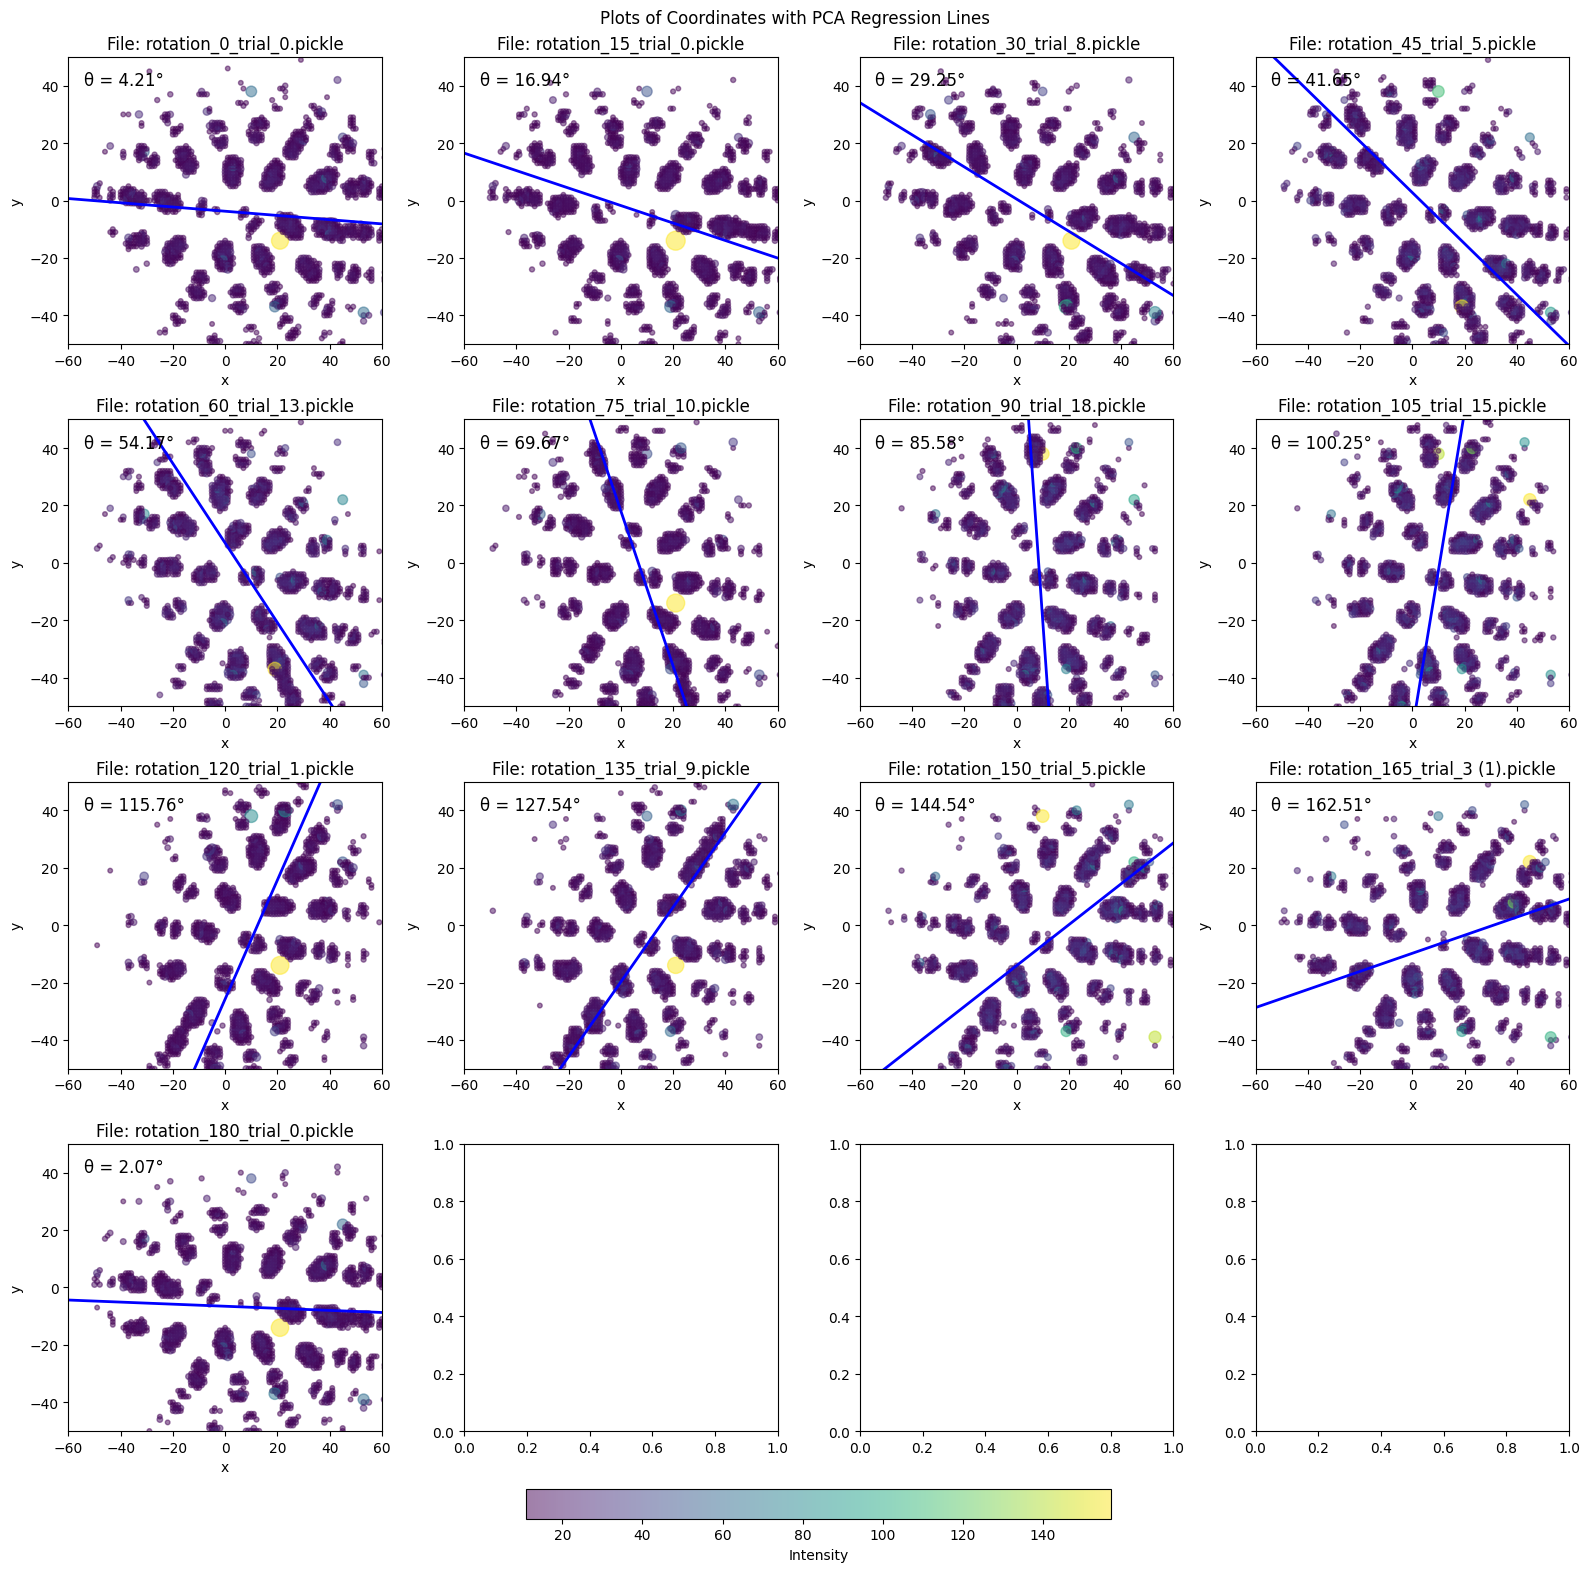

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from google.colab import files
from collections import Counter
from sklearn.decomposition import PCA

def process_file(pickle_filename):
    # Load data
    with open(pickle_filename, 'rb') as infile:
        data = pickle.load(infile)

    # Collect all (x, y) coordinates and re-center them around (0,0)
    coordinates = [(event.x - 60, event.y - 50) for event in data]

    return coordinates

def plot_coordinates_with_intensity(ax, coordinate_counts):
    # Filter coordinates that appear more than 10 times and less than 200 times
    filtered_coords = {coord: count for coord, count in coordinate_counts.items() if 10 < count < 200}

    if filtered_coords:
        x_coords, y_coords = zip(*filtered_coords.keys())
        intensities = list(filtered_coords.values())

        # Plot the filtered (x, y) coordinates with intensity
        scatter = ax.scatter(x_coords, y_coords, s=intensities, alpha=0.5, c=intensities, cmap='viridis')
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_xlim(-60, 60)
        ax.set_ylim(-50, 50)
        return scatter, filtered_coords

def plot_pca_line(ax, filtered_coords):
    if filtered_coords:
        x_coords, y_coords = zip(*filtered_coords.keys())

        # Center the data
        data = np.stack((x_coords, y_coords), axis=1)
        data_centered = data - np.mean(data, axis=0)

        # Perform PCA
        pca = PCA(n_components=1)
        pca.fit(data_centered)
        direction = pca.components_[0]

        # Calculate the slope and intercept of the PCA line
        slope = direction[1] / direction[0]
        x_mean = np.mean(x_coords)
        y_mean = np.mean(y_coords)
        intercept = y_mean - slope * x_mean

        # Generate points for the PCA line
        x_fit = np.linspace(-60, 60, 100)
        y_fit = slope * x_fit + intercept

        # Plot the PCA line
        ax.plot(x_fit, y_fit, linewidth=2, color='blue', label="PCA Line")

        # Calculate the angle with the negative x-axis in the clockwise direction
        angle = np.arctan(slope) * 180 / np.pi

        if slope >= 0:
            theta = 180 - angle
        else:
            theta = -angle  # Correct calculation for negative slope to ensure correct quadrant

        # Annotate the angle on the plot
        ax.text(0.05, 0.95, f'θ = {theta:.2f}°', transform=ax.transAxes, fontsize=12, verticalalignment='top')

        return slope, intercept, theta

def main():
    # Upload files
    print('Please upload exactly 13 pickle files.')
    uploaded = files.upload()

    if len(uploaded) != 13:
        print("Please upload exactly 13 files. Exiting.")
        return

    fig, axs = plt.subplots(4, 4, figsize=(16, 16))
    axs = axs.flatten()  # Flatten the array to easily iterate over it

    for i, pickle_filename in enumerate(uploaded.keys()):
        if i >= 13:  # We have space for only 13 plots in a 4x4 grid
            break
        coordinates = process_file(pickle_filename)

        # Count the occurrences of each coordinate
        coordinate_counts = Counter(coordinates)

        # Plot coordinates with intensity
        scatter, filtered_coords = plot_coordinates_with_intensity(axs[i], coordinate_counts)

        # Plot PCA line
        pca_slope, pca_intercept, theta = plot_pca_line(axs[i], filtered_coords)

        # Set the title of each subplot to the filename
        axs[i].set_title(f"File: {pickle_filename}")

        # Print the slopes, intercepts, and angle for debugging
        print(f"File: {pickle_filename}")
        print(f"PCA Slope: {pca_slope}, Intercept: {pca_intercept}, Angle: {theta:.2f}°")
        print("="*50)

    fig.suptitle('Plots of Coordinates with PCA Regression Lines')
    plt.tight_layout()
    fig.subplots_adjust(top=0.95)
    cbar = fig.colorbar(scatter, ax=axs, orientation='horizontal', fraction=0.02, pad=0.04)
    cbar.set_label('Intensity')
    plt.show()

if __name__ == '__main__':
    main()


TLS or Orthogonal Regression

Please upload exactly 13 pickle files.


Saving 1.pickle to 1 (22).pickle
Saving 2.pickle to 2 (22).pickle
Saving 3.pickle to 3 (22).pickle
Saving 4.pickle to 4 (22).pickle
Saving 5.pickle to 5 (22).pickle
Saving 6.pickle to 6 (22).pickle
Saving 7.pickle to 7 (22).pickle
Saving 8.pickle to 8 (22).pickle
Saving 9.pickle to 9 (22).pickle
Saving 10.pickle to 10 (22).pickle
Saving 11.pickle to 11 (22).pickle
Saving 12.pickle to 12 (22).pickle
Saving 13.pickle to 13 (22).pickle
File: 1 (22).pickle
Orthogonal Regression Slope: -0.07239034599730597, Intercept: -3.274223208500982, Angle: 4.14°
File: 2 (22).pickle
Orthogonal Regression Slope: -0.27200920312355337, Intercept: -2.130170379167818, Angle: 15.22°
File: 3 (22).pickle
Orthogonal Regression Slope: -0.5584398448273834, Intercept: 0.051617753244019404, Angle: 29.18°
File: 4 (22).pickle
Orthogonal Regression Slope: -0.8409841858697106, Intercept: 2.0325318536277965, Angle: 40.06°
File: 5 (22).pickle
Orthogonal Regression Slope: -1.3294374645007248, Intercept: 5.355731069376812, 

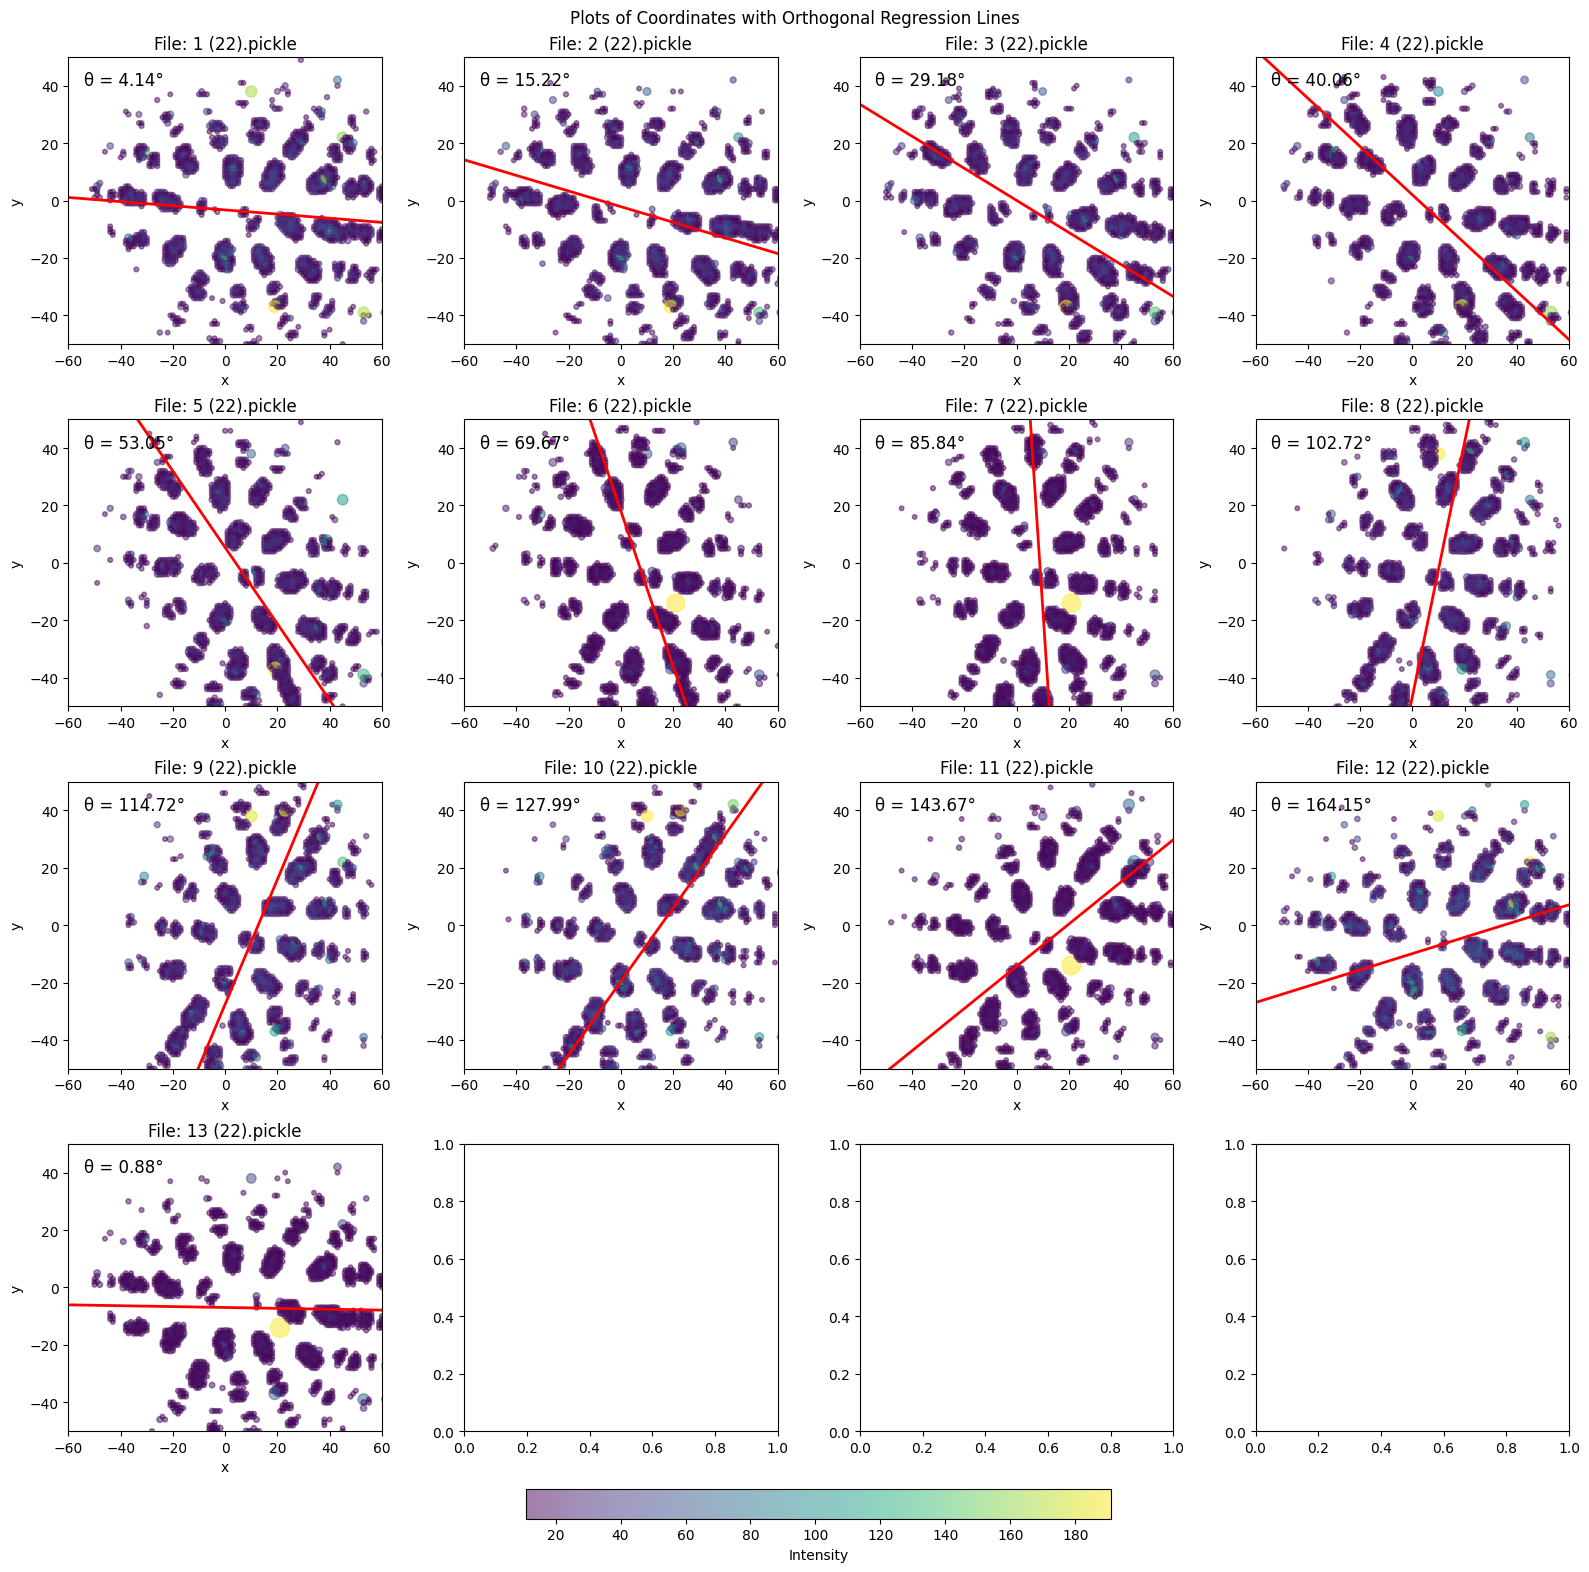

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from google.colab import files
from collections import Counter
from numpy.linalg import svd

def process_file(pickle_filename):
    # Load data
    with open(pickle_filename, 'rb') as infile:
        data = pickle.load(infile)

    # Collect all (x, y) coordinates and re-center them around (0,0)
    coordinates = [(event.x - 60, event.y - 50) for event in data]

    return coordinates

def plot_coordinates_with_intensity(ax, coordinate_counts):
    # Filter coordinates that appear more than 10 times and less than 200 times
    filtered_coords = {coord: count for coord, count in coordinate_counts.items() if 10 < count < 200}

    if filtered_coords:
        x_coords, y_coords = zip(*filtered_coords.keys())
        intensities = list(filtered_coords.values())

        # Plot the filtered (x, y) coordinates with intensity
        scatter = ax.scatter(x_coords, y_coords, s=intensities, alpha=0.5, c=intensities, cmap='viridis')
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_xlim(-60, 60)
        ax.set_ylim(-50, 50)
        return scatter, filtered_coords

def plot_orthogonal_regression_line(ax, filtered_coords):
    if filtered_coords:
        x_coords, y_coords = zip(*filtered_coords.keys())

        # Center the data
        data = np.stack((x_coords, y_coords), axis=1)
        data_centered = data - np.mean(data, axis=0)

        # Perform Singular Value Decomposition (SVD)
        U, S, Vt = svd(data_centered)
        direction = Vt[0]

        # Calculate the slope and intercept of the orthogonal regression line
        slope = direction[1] / direction[0]
        x_mean = np.mean(x_coords)
        y_mean = np.mean(y_coords)
        intercept = y_mean - slope * x_mean

        # Generate points for the orthogonal regression line
        x_fit = np.linspace(-60, 60, 100)
        y_fit = slope * x_fit + intercept

        # Plot the orthogonal regression line
        ax.plot(x_fit, y_fit, linewidth=2, color='red', label="Orthogonal Regression Line")

        # Calculate the angle with the negative x-axis in the clockwise direction
        angle = np.arctan(slope) * 180 / np.pi

        if slope >= 0:
            theta = 180 - angle
        else:
            theta = -angle  # Correct calculation for negative slope to ensure correct quadrant



        # Annotate the angle on the plot
        ax.text(0.05, 0.95, f'θ = {theta:.2f}°', transform=ax.transAxes, fontsize=12, verticalalignment='top')

        return slope, intercept, theta

def main():
    # Upload files
    print('Please upload exactly 13 pickle files.')
    uploaded = files.upload()

    if len(uploaded) != 13:
        print("Please upload exactly 13 files. Exiting.")
        return

    fig, axs = plt.subplots(4, 4, figsize=(16, 16))
    axs = axs.flatten()  # Flatten the array to easily iterate over it

    for i, pickle_filename in enumerate(uploaded.keys()):
        if i >= 13:  # We have space for only 13 plots in a 4x4 grid
            break
        coordinates = process_file(pickle_filename)

        # Count the occurrences of each coordinate
        coordinate_counts = Counter(coordinates)

        # Plot coordinates with intensity
        scatter, filtered_coords = plot_coordinates_with_intensity(axs[i], coordinate_counts)

        # Plot orthogonal regression line
        ortho_slope, ortho_intercept, theta = plot_orthogonal_regression_line(axs[i], filtered_coords)

        # Set the title of each subplot to the filename
        axs[i].set_title(f"File: {pickle_filename}")

        # Print the slopes, intercepts, and angle for debugging
        print(f"File: {pickle_filename}")
        print(f"Orthogonal Regression Slope: {ortho_slope}, Intercept: {ortho_intercept}, Angle: {theta:.2f}°")
        print("="*50)

    fig.suptitle('Plots of Coordinates with Orthogonal Regression Lines')
    plt.tight_layout()
    fig.subplots_adjust(top=0.95)
    cbar = fig.colorbar(scatter, ax=axs, orientation='horizontal', fraction=0.02, pad=0.04)
    cbar.set_label('Intensity')
    plt.show()

if __name__ == '__main__':
    main()


**GREYSCALING**

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to the processed file
processed_file_path = '/content/drive/My Drive/Final_Data/Centre/MG400_tapping20240710_132718/events/rotation_90_trial_17.pickle'

# Load the processed file
with open(processed_file_path, 'rb') as f:
    processed_data = pickle.load(f)

# Initialize a 128x128 grid to count timestamps
timestamp_counts = np.zeros((128, 128))

# Count timestamps for each cell
for i in range(128):
    for j in range(128):
        timestamp_counts[i, j] = len(processed_data[i, j])

# Normalize timestamp counts to range from 0 to 1 for greyscale
max_count = np.max(timestamp_counts)
normalized_counts = timestamp_counts / max_count

# Filter cells with significant occurrences
filtered_counts = np.array([(i, j, timestamp_counts[i, j]) for i in range(128) for j in range(128) if 10 < timestamp_counts[i, j] < 200])

if filtered_counts.size > 0:
    x_coords = filtered_counts[:, 0]
    y_coords = filtered_counts[:, 1]
    intensities = filtered_counts[:, 2]

    # Perform PCA on the filtered coordinates
    data = np.stack((x_coords, y_coords), axis=1)
    pca = PCA(n_components=2)
    pca.fit(data)

    # Get the principal component direction
    components = pca.components_
    mean = np.mean(data, axis=0)

    # Create a figure for the PCA transformed data
    fig, ax = plt.subplots(figsize=(128 / 100, 128 / 100), dpi=100)  # Size in inches and DPI
    scatter = ax.scatter(x_coords, y_coords, s=intensities, alpha=0.5, c=intensities, cmap='viridis')
    fig.colorbar(scatter)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(0, 127)
    ax.set_ylim(0, 127)
    ax.set_title('PCA Transformed Data with Regression Line')

    # Plot PCA line
    x_fit = np.linspace(min(x_coords), max(x_coords), 100)
    slope = components[0, 1] / components[0, 0]
    y_fit = slope * (x_fit - mean[0]) + mean[1]

    ax.plot(x_fit, y_fit, color='red', linewidth=2, label='PCA Line')
    ax.legend()

    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TypeError: list indices must be integers or slices, not tuple